In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import LETTER
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
from reportlab.lib.units import inch
import io
import numpy as np

# For displaying plots inline in Jupyter
%matplotlib inline

In [2]:
# This creates a sample dataset that matches the expected structure
np.random.seed(42)  # For reproducible results

# Create sample data
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
categories = ['Electronics', 'Clothing', 'Books', 'Home']
products = {
    'Electronics': ['Laptop', 'Phone', 'Tablet', 'Headphones'],
    'Clothing': ['Shirt', 'Pants', 'Shoes', 'Jacket'],
    'Books': ['Novel', 'Textbook', 'Magazine', 'Notebook'],
    'Home': ['Lamp', 'Chair', 'Table', 'Decor']
}

sample_data = []
for date in dates[:100]:  # Create 100 sample records
    category = np.random.choice(categories)
    product = np.random.choice(products[category])
    quantity = np.random.randint(1, 10)
    price = np.random.uniform(10, 500)
    
    sample_data.append({
        'Date': date,
        'Category': category,
        'Product': product,
        'Quantity': quantity,
        'Price': price
    })

# Create DataFrame and save as CSV
df_sample = pd.DataFrame(sample_data)
df_sample.to_csv('sample_data.csv', index=False)
print("Sample data created and saved as 'sample_data.csv'")
df_sample.head()

Sample data created and saved as 'sample_data.csv'


,Date,Category,Product,Quantity,Price
0,2023-01-01,Books,Notebook,8,303.342657
1,2023-01-02,Books,Textbook,3,58.987709
2,2023-01-03,Books,Notebook,5,304.546356
3,2023-01-04,Home,Table,6,37.641674
4,2023-01-05,Home,Decor,6,10.381595


In [3]:
def read_data(file_path):
    
    df = pd.read_csv(file_path, parse_dates=['Date'])
    return df

# Execute the function
df = read_data('sample_data.csv')
print("Data loaded successfully!")
print(f"Data shape: {df.shape}")
df.head()

Data loaded successfully!
Data shape: (100, 5)


,Date,Category,Product,Quantity,Price
0,2023-01-01,Books,Notebook,8,303.342657
1,2023-01-02,Books,Textbook,3,58.987709
2,2023-01-03,Books,Notebook,5,304.546356
3,2023-01-04,Home,Table,6,37.641674
4,2023-01-05,Home,Decor,6,10.381595


In [4]:
def analyze_data(df):
    
    df['Total'] = df['Quantity'] * df['Price']
    
    sales_by_category = df.groupby('Category')['Total'].sum().reset_index()
    quantity_by_product = df.groupby('Product')['Quantity'].sum().reset_index()
    total_sales = df['Total'].sum()
    total_quantity = df['Quantity'].sum()
    
    summary = {
        'total_sales': total_sales,
        'total_quantity': total_quantity,
        'sales_by_category': sales_by_category,
        'quantity_by_product': quantity_by_product
    }
    return summary

# Execute the analysis
summary = analyze_data(df)
print("Data analysis completed!")
print(f"Total Sales: ${summary['total_sales']:.2f}")
print(f"Total Quantity: {summary['total_quantity']} units")

Data analysis completed!
Total Sales: $138228.51
Total Quantity: 534 units


Sales by Category:


,Category,Total
0,Books,40610.361719
1,Clothing,37448.147926
2,Electronics,16837.464110
3,Home,43332.538988



Quantity by Product:


,Product,Quantity
0,Chair,38
1,Decor,40
2,Headphones,18
3,Jacket,39
4,Lamp,68
5,Laptop,10
6,Magazine,27
7,Notebook,34
8,Novel,38
9,Pants,40


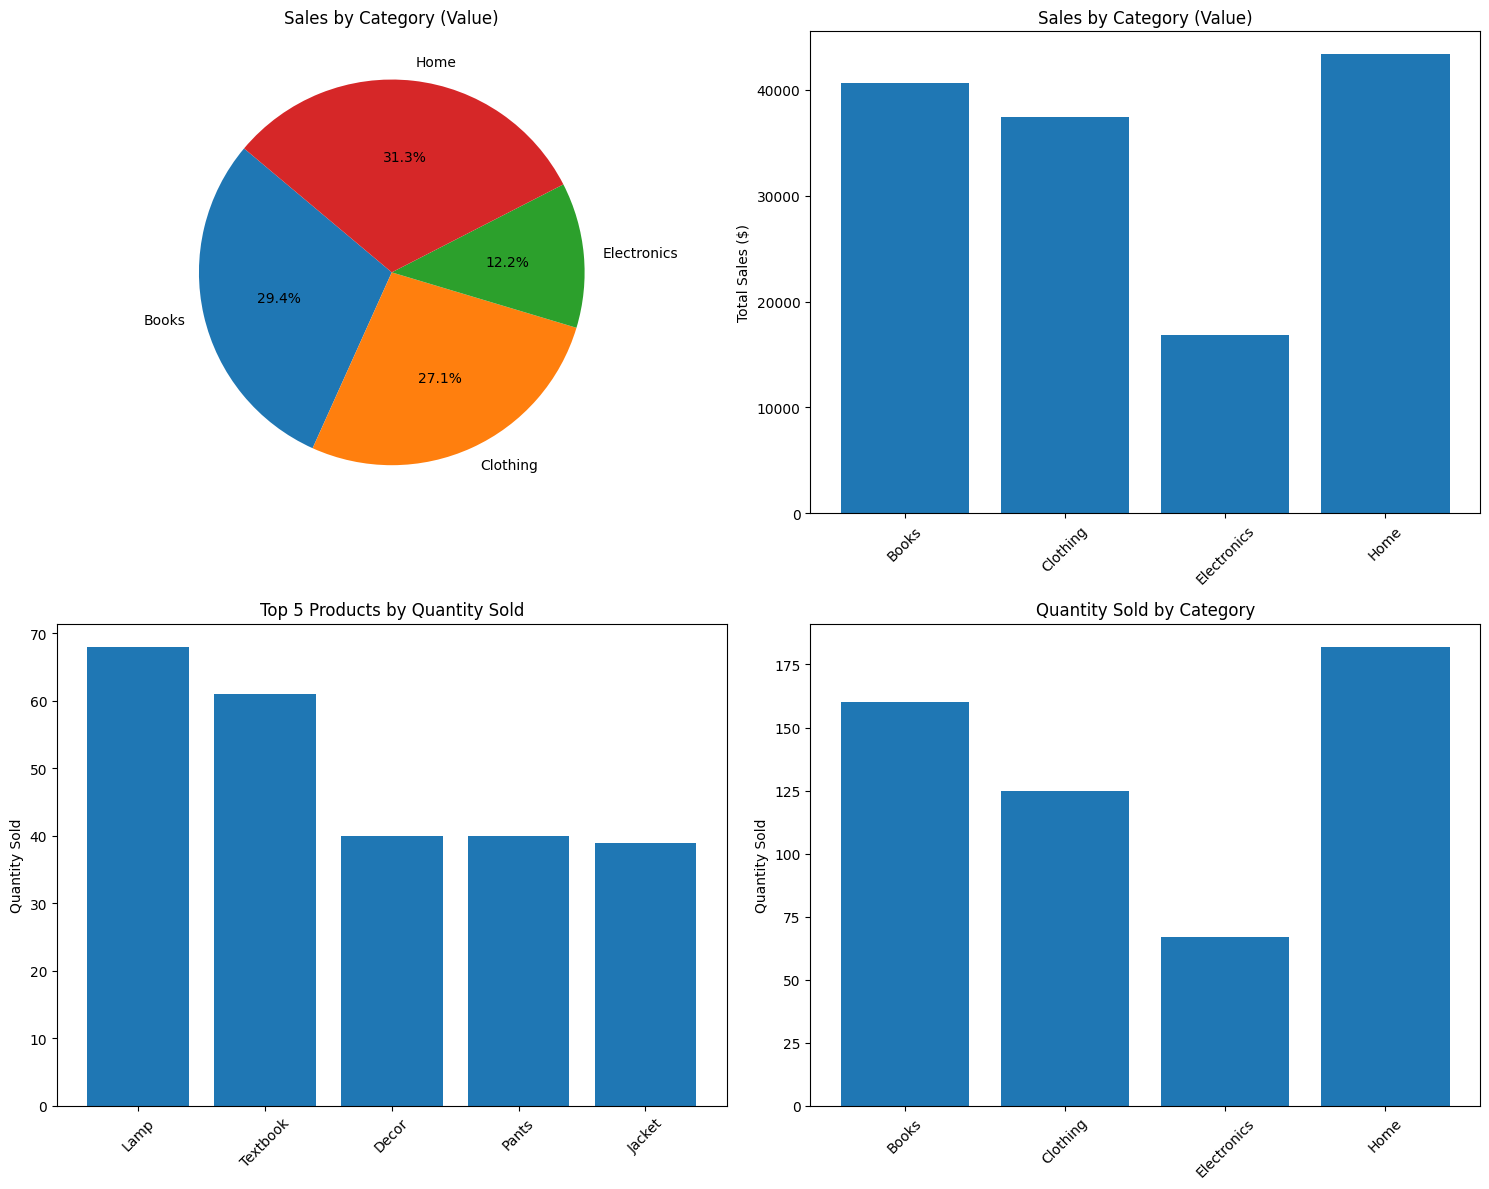

In [5]:

# Sales by Category
print("Sales by Category:")
display(summary['sales_by_category'])

# Quantity by Product
print("\nQuantity by Product:")
display(summary['quantity_by_product'])

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Pie chart for sales by category
axes[0, 0].pie(summary['sales_by_category']['Total'], 
               labels=summary['sales_by_category']['Category'], 
               autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Sales by Category (Value)')

# Bar chart for sales by category
axes[0, 1].bar(summary['sales_by_category']['Category'], summary['sales_by_category']['Total'])
axes[0, 1].set_title('Sales by Category (Value)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylabel('Total Sales ($)')

# Bar chart for top products by quantity
top_products = summary['quantity_by_product'].nlargest(5, 'Quantity')
axes[1, 0].bar(top_products['Product'], top_products['Quantity'])
axes[1, 0].set_title('Top 5 Products by Quantity Sold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylabel('Quantity Sold')

# Bar chart for sales by category (quantity)
category_quantity = df.groupby('Category')['Quantity'].sum().reset_index()
axes[1, 1].bar(category_quantity['Category'], category_quantity['Quantity'])
axes[1, 1].set_title('Quantity Sold by Category')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylabel('Quantity Sold')

plt.tight_layout()
plt.show()



Individual Sales Chart (for PDF):


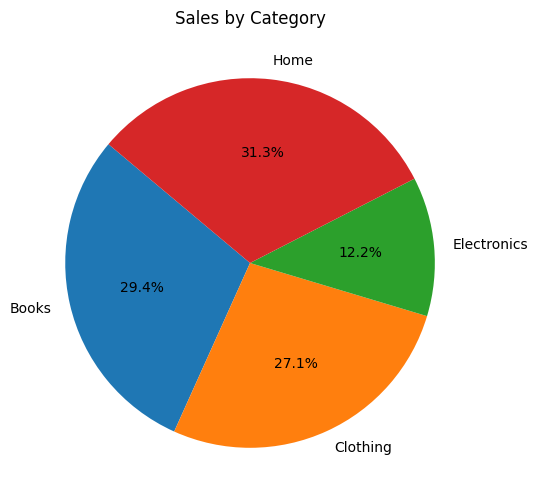

In [6]:
# Create sales chart function for PDF (separate from display)
def create_sales_chart(sales_by_category, display_in_notebook=True):
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(sales_by_category['Total'], 
           labels=sales_by_category['Category'], 
           autopct='%1.1f%%', startangle=140)
    ax.set_title('Sales by Category')
    
    if display_in_notebook:
        plt.show()
        return None
    else:
        # Save plot to a bytes buffer for PDF
        buf = io.BytesIO()
        plt.savefig(buf, format='PNG', dpi=150, bbox_inches='tight')
        plt.close(fig)
        buf.seek(0)
        
        # Create ReportLab Image
        img = Image(buf, 4*inch, 4*inch)
        return img

# Display the individual chart
print("\nIndividual Sales Chart (for PDF):")
create_sales_chart(summary['sales_by_category'], display_in_notebook=True)

In [7]:
def generate_pdf_report(data_summary, output_path):
    
    doc = SimpleDocTemplate(output_path, pagesize=LETTER)
    styles = getSampleStyleSheet()
    story = []
    
    # Title
    title_style = styles['Title']
    story.append(Paragraph("Sales Report", title_style))
    story.append(Spacer(1, 12))
    
    # Summary Paragraph
    normal_style = styles['Normal']
    summary_text = (
        f"Total Sales: ${data_summary['total_sales']:.2f}<br/>"
        f"Total Quantity Sold: {data_summary['total_quantity']} units"
    )
    story.append(Paragraph(summary_text, normal_style))
    story.append(Spacer(1, 12))
    
    # Sales by Category Table
    story.append(Paragraph("Sales by Category", styles['Heading2']))
    sales_cat_data = [['Category', 'Total Sales ($)']]
    for _, row in data_summary['sales_by_category'].iterrows():
        sales_cat_data.append([row['Category'], f"${row['Total']:.2f}"])
    
    t = Table(sales_cat_data, hAlign='LEFT')
    t.setStyle(TableStyle([
        ('BACKGROUND', (0,0), (-1,0), colors.grey),
        ('TEXTCOLOR',(0,0),(-1,0),colors.whitesmoke),
        ('ALIGN',(0,0),(-1,-1),'CENTER'),
        ('FONTNAME', (0,0), (-1,0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0,0), (-1,0), 12),
        ('GRID', (0,0), (-1,-1), 1, colors.black),
    ]))
    story.append(t)
    story.append(Spacer(1, 12))
    
    # Quantity by Product Table
    story.append(Paragraph("Quantity Sold by Product", styles['Heading2']))
    qty_prod_data = [['Product', 'Quantity Sold']]
    for _, row in data_summary['quantity_by_product'].iterrows():
        qty_prod_data.append([row['Product'], int(row['Quantity'])])
    
    t2 = Table(qty_prod_data, hAlign='LEFT')
    t2.setStyle(TableStyle([
        ('BACKGROUND', (0,0), (-1,0), colors.grey),
        ('TEXTCOLOR',(0,0),(-1,0),colors.whitesmoke),
        ('ALIGN',(0,0),(-1,-1),'CENTER'),
        ('FONTNAME', (0,0), (-1,0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0,0), (-1,0), 12),
        ('GRID', (0,0), (-1,-1), 1, colors.black),
    ]))
    story.append(t2)
    story.append(Spacer(1, 12))
    
    # Add Pie Chart (use the version that returns ReportLab Image)
    story.append(Paragraph("Sales Distribution by Category", styles['Heading2']))
    chart = create_sales_chart(data_summary['sales_by_category'], display_in_notebook=False)
    story.append(chart)
    
    # Build PDF
    doc.build(story)
    print(f"Report generated: {output_path}")

# Generate the PDF report
generate_pdf_report(summary, 'sales_report.pdf')

Report generated: sales_report.pdf


In [8]:
print("Analysis Complete! Here's a summary:")

# Display basic statistics
print(f"\nDataset Overview:")
print(f"- Time period: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"- Number of transactions: {len(df)}")
print(f"- Number of categories: {df['Category'].nunique()}")
print(f"- Number of products: {df['Product'].nunique()}")

# Show top performing categories and products
top_category = summary['sales_by_category'].loc[summary['sales_by_category']['Total'].idxmax()]
top_product_qty = summary['quantity_by_product'].loc[summary['quantity_by_product']['Quantity'].idxmax()]

print(f"\nTop Performing Category: {top_category['Category']} (${top_category['Total']:.2f})")
print(f"Top Selling Product (by quantity): {top_product_qty['Product']} ({top_product_qty['Quantity']} units)")

# Display a sample of the data
print(f"\nSample of the data:")
display(df.sample(5))

Analysis Complete! Here's a summary:

Dataset Overview:
- Time period: 2023-01-01 to 2023-04-10
- Number of transactions: 100
- Number of categories: 4
- Number of products: 16

Top Performing Category: Home ($43332.54)
Top Selling Product (by quantity): Lamp (68 units)

Sample of the data:


,Date,Category,Product,Quantity,Price,Total
97,2023-04-08,Clothing,Shirt,8,457.487871,3659.902966
73,2023-03-15,Electronics,Tablet,9,12.480176,112.321585
80,2023-03-22,Clothing,Pants,6,489.657501,2937.945003
34,2023-02-04,Books,Novel,4,286.005030,1144.020121
35,2023-02-05,Home,Chair,5,132.153192,660.765961
